# Recursive Feature Elimination (RFE) for Feature Selection in Python

https://machinelearningmastery.com/rfe-feature-selection-in-python/

Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

There are two important configuration options when using RFE: the choice in the number of features to select and the choice of the algorithm used to help choose features. Both of these hyperparameters can be explored, although the performance of the method is not strongly dependent on these hyperparameters being configured well.

In this tutorial, you will discover how to use Recursive Feature Elimination (RFE) for feature selection in Python.

After completing this tutorial, you will know:

 * RFE is an efficient approach for eliminating features from a training dataset for feature selection.
 * How to use RFE for feature selection for classification and regression predictive modeling problems.
 * How to explore the number of selected features and wrapped algorithm used by the RFE procedure.

## Tutorial Overview

This tutorial is divided into three parts; they are:

1. Recursive Feature Elimination
2. RFE With scikit-learn
    - RFE for Classification
    - RFE for Regression
3. RFE Hyperparameters
    - Explore Number of Features
    - Automatically Select the Number of Features
    - Which Features Were Selected
    - Explore Base Algorithm
    - Recursive Feature Elimination

Recursive Feature Elimination, or RFE for short, is a feature selection algorithm.

A machine learning dataset for classification or regression is comprised of rows and columns, like an excel spreadsheet. Rows are often referred to as samples and columns are referred to as features, e.g. features of an observation in a problem domain.

Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.

Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [25]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [12]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

## RFE With scikit-learn

RFE is a transform. To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.

The algorithm must provide a way to calculate important scores, such as a decision tree. The algorithm used in RFE does not have to be the algorithm that is fit on the selected features; different algorithms can be used.

Once configured, the class must be fit on a training dataset to select the features by calling the fit() function. After the class is fit, the choice of input variables can be seen via the “support_” attribute that provides a True or False for each input variable.

It is common to use k-fold cross-validation to evaluate a machine learning algorithm on a dataset. When using cross-validation, it is good practice to perform data transforms like RFE as part of a Pipeline to avoid data leakage.

Now that we are familiar with the RFE API, let’s take a look at how to develop a RFE for both classification and regression.

## RFE for Classification

In this section, we will look at using RFE for a classification problem.

First, we can use the make_classification() function to create a synthetic binary classification problem with 1,000 examples and 10 input features, five of which are important and five of which are redundant.

The complete example is listed below.

In [13]:
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.884 (0.031)


In [14]:
# create pipeline
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.891 (0.028)


We can also use the RFE model pipeline as a final model and make predictions for classification.

First, the RFE and model are fit on all available data, then the predict() function can be called to make predictions on new data.

The example below demonstrates this on our binary classification dataset.

In [15]:
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X, y)
# make a prediction for one example
data = [[2.56999479,-0.13019997,3.16075093,-4.35936352,-1.61271951,-1.39352057,-2.48924933,-1.93094078,3.26130366,2.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


## RFE Hyperparameters

In this section, we will take a closer look at some of the hyperparameters you should consider tuning for the RFE method for feature selection and their effect on model performance.

### Explore Number of Features

An important hyperparameter for the RFE algorithm is the number of features to select.

In the previous section, we used an arbitrary number of selected features, five, which matches the number of informative features in the synthetic dataset. In practice, we cannot know the best number of features to select with RFE; instead, it is good practice to test different values.

The example below demonstrates selecting different numbers of features from 2 to 10 on the synthetic binary classification dataset.

>2 0.716 (0.043)
>3 0.826 (0.036)
>4 0.874 (0.036)
>5 0.888 (0.031)
>6 0.888 (0.029)
>7 0.887 (0.027)
>8 0.886 (0.027)
>9 0.884 (0.025)


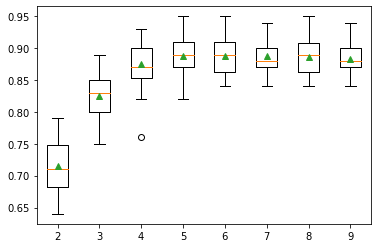

In [19]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

A box and whisker plot is created for the distribution of accuracy scores for each configured number of features.

In this case, we can see that performance improves as the number of features increase and perhaps peaks around 4-to-7 as we might expect, given that only five features are relevant to the target variable.

## Automatically Select the Number of Features

It is also possible to automatically select the number of features chosen by RFE.

This can be achieved by performing cross-validation evaluation of different numbers of features as we did in the previous section and automatically selecting the number of features that resulted in the best mean score.

The RFECV class implements this for us.

The RFECV is configured just like the RFE class regarding the choice of the algorithm that is wrapped. Additionally, the minimum number of features to be considered can be specified via the “min_features_to_select” argument (defaults to 1) and we can also specify the type of cross-validation and scoring to use via the “cv” (defaults to 5) and “scoring” arguments (uses accuracy for classification).

In [22]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.026)


## Which Features Were Selected

When using RFE, we may be interested to know which features were selected and which were removed.

This can be achieved by reviewing the attributes of the fit RFE object (or fit RFECV object). The “support_” attribute reports true or false as to which features in order of column index were included and the “ranking_” attribute reports the relative ranking of features in the same order.

The example below fits an RFE model on the whole dataset and selects five features, then reports each feature column index (0 to 9), whether it was selected or not (True or False), and the relative feature ranking.

In [24]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 6.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 5.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000


## Explore Base Algorithm

There are many algorithms that can be used in the core RFE, as long as they provide some indication of variable importance.

Most decision tree algorithms are likely to report the same general trends in feature importance, but this is not guaranteed. It might be helpful to explore the use of different algorithms wrapped by RFE.

The example below demonstrates how you might explore this configuration option.

>lr 0.891 (0.031)
>per 0.849 (0.041)
>cart 0.886 (0.035)
>rf 0.857 (0.041)
>gbm 0.889 (0.033)


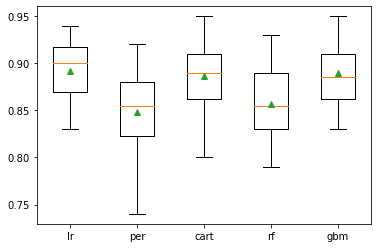

In [26]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, the results suggest that linear algorithms like logistic regression might select better features more reliably than the chosen decision tree and ensemble of decision tree algorithms.

A box and whisker plot is created for the distribution of accuracy scores for each configured wrapped algorithm.

We can see the general trend of good performance with logistic regression, CART and perhaps GBM. This highlights that even thought the actual model used to fit the chosen features is the same in each case, the model used within RFE can make an important difference to which features are selected and in turn the performance on the prediction problem.